In [1]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy.random as npr
from copy import deepcopy
from sklearn.cluster import KMeans
import seaborn as sns



In [2]:
# Uploading ML dataset
base=pd.read_csv('/Users/elvinagovendasamy/TER/BigML_Dataset.csv',sep=',')
base.head(5)

,customer_id,avg_distance_to_shops,min_distance_to_shops,max_distance_to_shops,products_purchased,unique_products_purchased,amount_purchased,avg_purchase,avg_price,shops_used,...,avg_purchase_shop_1,avg_purchase_shop_2,avg_purchase_shop_3,avg_purchase_shop_4,avg_purchase_shop_5,avg_price_shop_1,avg_price_shop_2,avg_price_shop_3,avg_price_shop_4,avg_price_shop_5
0,1,1434.91910,985.87620,4082.5222,3090.0,473.0,7551.701,14.221659,3.150493,2.0,...,10.441143,14.862848,0.000000,0.0,0.000000,6.393403,2.600485,0.000000,0.0,0.000000
1,2,909.76764,254.94832,2295.4840,4508.0,486.0,7820.219,11.235947,2.191422,4.0,...,3.761943,4.848720,2.546600,0.0,16.479185,2.851152,2.009863,2.059450,0.0,2.103394
2,3,1498.94700,754.29560,2831.7727,814.0,234.0,1788.613,5.453088,2.258994,4.0,...,3.757062,5.605183,1.923385,0.0,5.924268,3.426687,2.478529,1.923385,0.0,1.947067
3,4,561.65900,362.79178,2210.3820,648.0,208.0,1679.520,5.976940,2.614292,4.0,...,4.997400,2.688400,5.029184,0.0,7.156351,4.997400,2.688400,2.083168,0.0,2.754427
4,5,605.36280,275.46753,1375.1184,13.0,10.0,17.922,1.792200,1.692000,2.0,...,0.000000,0.967667,2.145571,0.0,0.000000,0.000000,0.633667,2.145571,0.0,0.000000


In [3]:
X=base.iloc[:,1:]
Y=base.iloc[:,0]

In [4]:
# Imputing strategy
# Part A : mean or median for numeric and most-frequency for categorical

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.
        """
        
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [5]:
# Imputing based on mean for numeric, and most frequent for strings
X = DataFrameImputer().fit_transform(X)

X.fillna(X.mean())
Y.fillna(Y.mean())

0            1
1            2
2            3
3            4
4            5
         ...  
60361    60362
60362    60363
60363    60364
60364    60365
60365    60366
Name: customer_id, Length: 60366, dtype: int64

# Initialization

In [39]:
m,n=X.shape[0],X.shape[1]
print(m,n) # m est le nombre d'observations, n est le nombre de variables explicatives.
N=1000 # on choisit de faire 100 itérations
k=3 #3 clusters

60366 39


# K means

In [40]:
# Initialisation for lloyd algorithm
def init_random(k,X):
    centroids=np.array([]).reshape(n,0)
    for i in range(k):
        u=npr.randint(0,m-1) #on choisit 'randomly' entre les 150 observations
        centroids=np.c_[centroids,X.iloc[u,:]] # concatenate matrice vide
    centroids=centroids.reshape(k,n)
    return centroids



In [41]:
def kmeans_lloyd(k,X):
    
    centroids=init_random(k,X)
    
    error = 10 #random number chosen

    while error > 10**(-10):
        distances=np.zeros((m,k))
        clusters = np.zeros(n)
        for i in range(k):
                distances[:,i]=np.linalg.norm(X-centroids[i,:],axis=1)
        clusters=np.argmin(distances,axis=1)
        centroids_new=deepcopy(centroids)
        for i in range(k):
            centroids_new[i,:]=np.mean(X.iloc[clusters==i,:],axis=0) # on trouve la moyenne pour chq variable
        error = np.linalg.norm(centroids - centroids_new)
        centroids=deepcopy(centroids_new)
        return centroids

In [42]:
centroids_lloyd=kmeans_lloyd(3,X)
print(centroids_lloyd)

[[9.51799675e+02 5.33745264e+02 2.60159747e+03 8.02142012e+03
  5.73775148e+02 1.58747599e+04 2.37044703e+01 2.73047399e+00
  2.66863905e+00 1.77906171e+03 4.04735143e+03 2.56620859e+03
  8.44546617e+02 1.88610523e+03 4.41076923e+02 1.55775148e+02
  7.97396450e+02 6.50654438e+03 1.20627219e+02 1.38041420e+02
  4.34970414e+01 4.49171598e+01 4.79970414e+02 1.67810651e+01
  1.28419341e+03 3.74470438e+02 1.39886714e+03 1.25671459e+04
  2.50083053e+02 1.52869352e+01 2.61485750e+00 3.20354393e+00
  2.50239312e+01 9.73778157e-01 1.33247899e+01 1.74190250e+00
  5.05412704e-01 2.31077025e+00 5.28731376e-01]
 [1.55118382e+03 1.08354829e+03 2.02498547e+03 5.77345393e+03
  6.31775079e+02 1.34962933e+04 1.67347305e+01 3.34202954e+00
  2.15229233e+00 2.21270818e+03 2.58367293e+03 1.87074578e+03
  2.62845106e+03 1.87785186e+03 3.02382955e+03 1.66945506e+03
  7.23460962e+02 9.10653654e+01 2.65642987e+02 4.48603041e+02
  1.99280754e+02 8.04323650e+01 1.76756695e+01 3.18195642e+01
  7.59029600e+03 3.808

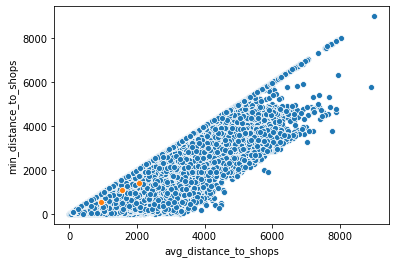

In [43]:
# Plot the data
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1])
sns.scatterplot(x=centroids_lloyd[:,0],y=centroids_lloyd[:,1])

# K means ++

In [ ]:
m,n=X.shape[0],X.shape[1]
print(m,n) # m est le nombre d'observations, n est le nombre de variables explicatives.
N=1000 # on choisit de faire 100 itérations
k=3 #3 clusters

In [46]:
# Initialisation using probability (kmeans++)

def init_kpp(k,X):
    centroids_rand=np.array([]).reshape(n,0)
    for i in range(k):
        rand=npr.randint(0,m-1)
        centroids_rand=np.c_[centroids_rand,X.iloc[rand,:]]
        
        while len(centroids_rand)<k:
            d2 = np.array([min([np.square(eucl_dist(i,c, None)) for c in temp]) for i in X])
            prob = d2/d2.sum()
            cum_prob = prob.cumsum()
            r = np.random.random()
            ind = np.where(cum_prob >= r)[0][0]
            centroids_rand.append(X[ind])
    centroids_rand=np.array(centroids_rand)
    centroids_rand=centroids_rand.reshape(k,n)
    return centroids_rand

In [47]:
# Performing k_means_lloyd
def kmeans_kpp(k,X):
    
    centroids=init_kpp(k,X)
    
    error = 10 #random number chosen

    while error > 10**(-10):
        distances=np.zeros((m,k))
        clusters = np.zeros(n)
        for i in range(k):
                distances[:,i]=np.linalg.norm(X-centroids[i,:],axis=1)
        clusters=np.argmin(distances,axis=1)
        centroids_new=deepcopy(centroids)
        for i in range(k):
            centroids_new[i,:]=np.mean(X.iloc[clusters==i,:],axis=0) # on trouve la moyenne pour chq variable
        error = np.linalg.norm(centroids - centroids_new)
        centroids=deepcopy(centroids_new)
        return centroids

In [48]:
centroids_kpp=kmeans_kpp(3,X)
print(centroids_kpp)

[[1.06472060e+03 5.84591713e+02 2.66837643e+03 1.14496190e+04
  6.85890476e+02 2.30223500e+04 2.75227778e+01 2.83650316e+00
  2.95238095e+00 1.96178486e+03 2.84481357e+03 1.80724564e+03
  2.01987722e+03 1.61751219e+03 6.68600000e+02 2.69558571e+03
  2.45002381e+03 3.64099048e+03 1.99441905e+03 1.84923810e+02
  1.88761905e+02 1.52461905e+02 2.47795238e+02 1.29728571e+02
  1.84580444e+03 5.75738277e+03 4.53143263e+03 7.11462693e+03
  3.77310309e+03 1.49237144e+01 1.02903280e+01 8.71037835e+00
  1.34965991e+01 6.50299421e+00 1.17164016e+01 2.45514622e+00
  1.13709807e+00 1.32676886e+00 8.99754007e-01]
 [3.56788060e+03 2.63658622e+03 4.67580339e+03 2.91657753e+03
  4.42497034e+02 7.00863276e+03 1.05689213e+01 3.76100487e+00
  2.33859633e+00 4.03845372e+03 3.27143407e+03 3.42717405e+03
  4.46409879e+03 3.69333169e+03 1.65216400e+03 1.13694843e+03
  6.32132883e+01 3.48264123e+01 2.94253902e+01 3.24775669e+02
  1.99385324e+02 1.62288035e+01 8.91229351e+00 7.15798120e+00
  4.17793913e+03 2.583

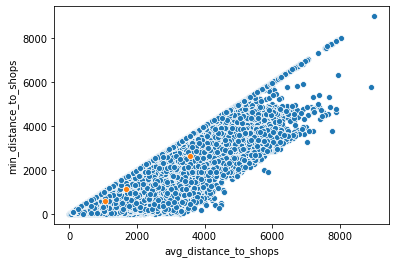

In [49]:
# Plot the data
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1])
sns.scatterplot(x=centroids_kpp[:,0],y=centroids_kpp[:,1])